### Data Set Infomation

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of 

probability of default among six data mining methods. From the perspective of risk management, the result of 

predictive accuracy of the estimated probability of default will be more valuable than the binary result of 

classification - credible or not credible clients. Because the real probability of default is unknown, this study 

presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real 

probability of default as the response variable (Y), and the predictive probability of default as the independent 

variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by 

artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to 

zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural 

network is the only one that can accurately estimate the real probability of default.

#### Attribute Information

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np 
import sklearn as skl
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

/home/kunal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load the dataset
tsne_data = pd.read_csv("../input/UCI_Credit_Card.csv")
#Rename the the column from 'default.payment.next.month' to default
tsne_data.rename(columns = {'default.payment.next.month':'default'}, inplace=True)

In [3]:
#Dividing the data set into default and non default observation 
df2 = tsne_data[tsne_data.default == 0].sample(n = 1000)
df3 = tsne_data[tsne_data.default == 1].sample(n = 1000)
df4 = pd.concat([df2, df3], axis = 0)

In [4]:
#Scale features to improve the training ability of TSNE.(t-distributed Stochastic Neighbor Embedding.)
standard_scaler = StandardScaler()
df4_std = standard_scaler.fit_transform(df4)

In [5]:
#Set y equal to the target values.
y = df4.ix[:,-1].values
#The fit_transform function calibrates your measurement 
#so that training data and test data have a similar shape
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df4_std)

#### Data Visualization using Bokeh

In [6]:
#importing the packages
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import numpy as np
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
# output to ipython notebook
output_notebook()
#taking two color for mapping
color_map = {0:'red', 1:'blue'}
p = figure(plot_width=400, plot_height=400)
#Scatter plotting of data
for idx, cl in enumerate(np.unique(y)):       
        p.scatter(x = x_test_2d[y==cl,0],y = x_test_2d[y==cl,1], size=20,color= color_map[idx], alpha=0.5)
# show the results
show(p)

Loading BokehJS ...

In [7]:
#Getting total columns
tsne_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [8]:
#Getting the top five data
tsne_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
#Checking for null
tsne_data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [10]:
#Decribing the Default and non Default of AGE
print ("Default :")
print (tsne_data.AGE[tsne_data.default == 1].describe())
print ()
print ("NO default :")
print (tsne_data.AGE[tsne_data.default == 0].describe())

Default :
count    6636.000000
mean       35.725738
std         9.693438
min        21.000000
25%        28.000000
50%        34.000000
75%        42.000000
max        75.000000
Name: AGE, dtype: float64

NO default :
count    23364.000000
mean        35.417266
std          9.077355
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


In [11]:
#Plotting the data for default
p1 = figure(title="Default: Normal Distribution",tools="save",
            background_fill_color="#E8DDCB")

mu, sigma = 1, 2.5   #parameter for Normal distribution
#Random Normal Distribution
measured = np.random.normal(mu, sigma, 1000)
#Define histogram and edges
hist, edges = np.histogram(measured, density=True, bins=50)
#Assigning the value 
x = tsne_data.AGE[tsne_data.default == 1]
#Define Probability density function
pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
#Define cumulative density function
cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2
#Plotting vertical bar
p1.vbar(x,top=hist,width=0.5, bottom=0,fill_color="#036564", line_color="#033649")

#Plotting line
p1.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p1.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")
#Defining some parameters
p1.legend.location = "center_right"
p1.legend.background_fill_color = "darkgrey"
p1.xaxis.axis_label = 'Age'
p1.yaxis.axis_label = 'Number of Observations'

/home/kunal/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('top', 50), ('x', 6636)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [12]:
#Plotting the data for Non Default
p2 = figure(title="Non Default:Normal Distribution ", tools="save",
            background_fill_color="#E8DDCB")

mu, sigma = 1, 2.5    #Parameter for Log Normal Distribution
#Rnadom Normal Distribution
measured = np.random.normal(mu, sigma, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)
#Assigning the parameter value
x = tsne_data.AGE[tsne_data.default == 0]
#Defining Density functions
pdf = 1/(x* sigma * np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((np.log(x)-mu)/(np.sqrt(2)*sigma)))/2
#Define a bar plot
p2.vbar(x,top=hist,width=0.5, bottom=0,fill_color="#036564", line_color="#033649")
#Line plot
p2.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p2.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")
#Defining some parameters
p2.legend.location = "center_right"
p2.legend.background_fill_color = "darkgrey"
p1.xaxis.axis_label = 'Age'
p1.yaxis.axis_label = 'Number of Observations'

/home/kunal/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('top', 50), ('x', 23364)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [13]:
#Plotting the data for Default
p3 = figure(title="Default: Gamma Distribution", tools="save",
            background_fill_color="#E8DDCB")

k, theta = 1.0, 2.0     #Assign Parameters values 
#Applying gama distribution function
measured = np.random.gamma(k, theta, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)
#Assigning parameter values
x = tsne_data.EDUCATION[tsne_data.default == 1]
#Defining some distribution function
pdf = x**(k-1) * np.exp(-x/theta) / (theta**k * scipy.special.gamma(k))
cdf = scipy.special.gammainc(k, x/theta) / scipy.special.gamma(k)
#Plotting Bar
p3.vbar(x,top=hist,width=0.5, bottom=0,fill_color="#036564", line_color="#033649")
#Line Plotting
p3.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p3.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")
#Defining some parameters
p3.legend.location = "center_right"
p3.legend.background_fill_color = "darkgrey"
p3.xaxis.axis_label = 'EDUCATION'
p3.yaxis.axis_label = 'Number of Observations'

/home/kunal/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('top', 50), ('x', 6636)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [14]:
#Plotting Figures
p4 = figure(title="Non Default: Weibull Distribution ", tools="save",
            background_fill_color="#E8DDCB")

lam, k = 1, 1.25  #Assign Parameters
#Applying some distribution functions
measured = lam*(-np.log(np.random.uniform(0, 1, 1000)))**(1/k)
hist, edges = np.histogram(measured, density=True, bins=50)
#Assign some parameters value 
x =tsne_data.EDUCATION[tsne_data.default == 0]
#Defining some Distribution functions
pdf = (k/lam)*(x/lam)**(k-1) * np.exp(-(x/lam)**k)
cdf = 1 - np.exp(-(x/lam)**k)
#Plotting Bar
p4.vbar(x,top=hist,width=0.5, bottom=0,fill_color="#036564", line_color="#033649")
#Line Plot
p4.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p4.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")
#Defining some parameters
p4.legend.location = "center_right"
p4.legend.background_fill_color = "darkgrey"
p4.xaxis.axis_label = 'EDUCATION'
p4.yaxis.axis_label = 'Number of Observations'
#Plotting Graph 
show(gridplot(p1,p2,p3,p4, ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

/home/kunal/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('top', 50), ('x', 23364)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


#### Classification

In [15]:
#Importing packages
from sklearn import preprocessing
import random
random.seed(90)
from sklearn.neural_network import MLPClassifier
print('Random',random.random())
import matplotlib as plt
from sklearn.preprocessing import StandardScaler  
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm as svm
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,cross_validation,svm,neighbors
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Random 0.20367044742105156


In [16]:
#Method to assign unique value
def describe_factor(x):
    ret = dict()
    for lvl in x.unique():
        if pd.isnull(lvl):
            ret["NaN"] = x.isnull().sum()
        else:
           ret[lvl] = np.sum(x==lvl)
    return ret

In [17]:
#Describe SEX factor
print('Sex')
print(describe_factor(tsne_data['SEX']))

Sex
{2: 18112, 1: 11888}


In [18]:
#Printing Education in original keep
print('Education is ordinnal Keep it, but set, others to NA')
print(describe_factor(tsne_data["EDUCATION"]))

Education is ordinnal Keep it, but set, others to NA
{2: 14030, 1: 10585, 3: 4917, 5: 280, 4: 123, 6: 51, 0: 14}


In [19]:
#Print the value of Education after mapping
tsne_data["EDUCATION"] = tsne_data["EDUCATION"].map({0: np.NaN, 1:1, 2:2, 3:3,4:np.NaN,5: np.NaN, 6: np.NaN})
print(describe_factor(tsne_data["EDUCATION"]))

{2.0: 14030, 1.0: 10585, 3.0: 4917, 'NaN': 468}


In [20]:
#Marriage Column 
print('MARRIAGE 0,3=>NA')
print(describe_factor(tsne_data["MARRIAGE"]))

MARRIAGE 0,3=>NA
{1: 13659, 2: 15964, 3: 323, 0: 54}


In [21]:
#Marriage column after mapping
tsne_data.MARRIAGE = tsne_data.MARRIAGE.map({0:np.NaN, 1:1, 2:0, 3:np.NaN})
print(describe_factor(tsne_data.MARRIAGE))

{1.0: 13659, 0.0: 15964, 'NaN': 377}


In [22]:
#Describe other quantity
print("Others are quantitative and presents")
print(tsne_data.describe())

Others are quantitative and presents
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  29532.000000  29623.000000   
mean   15000.500000   167484.322667      1.603733      1.808073      0.461094   
std     8660.398374   129747.661567      0.489129      0.698643      0.498492   
min        1.000000    10000.000000      1.000000      1.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      0.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      0.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      1.000000   
max    30000.000000  1000000.000000      2.000000      3.000000      1.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667

In [23]:
#Print the total of null value
print(tsne_data.isnull().sum())

ID             0
LIMIT_BAL      0
SEX            0
EDUCATION    468
MARRIAGE     377
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
default        0
dtype: int64


In [24]:
#Indexing the EDUCATION and Marriage column to mean value
tsne_data.ix[tsne_data["EDUCATION"].isnull(), "EDUCATION"] = tsne_data["EDUCATION"].mean()
tsne_data.ix[tsne_data["MARRIAGE"].isnull(), "MARRIAGE"] = tsne_data["MARRIAGE"].mean()
print(tsne_data.isnull().sum().sum())

0


In [25]:
#Target value
target = 'default'
describe_factor(tsne_data[target])

{0: 23364, 1: 6636}

In [26]:
#Getting X and Y value for prediction
predictors = tsne_data.columns.drop(['ID', target])
X = np.asarray(tsne_data[predictors])
y = np.asarray(tsne_data[target])

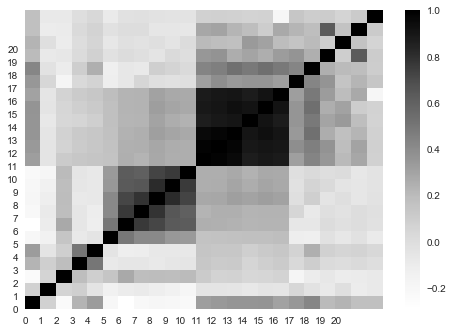

In [27]:
#Assigning some value into data
data=X[:300,:].transpose()
#Getting corelation coefficient
R = corrcoef(data)
pcolor(R)
colorbar()
yticks(arange(0,21),range(0,22))
xticks(arange(0,21),range(0,22))
show()
X = X
Y =y
#Define Logistic Regression Model
model = LogisticRegression()

In [54]:
#Method for Classification
def run_classification_algorithms(X1, features_list, num_of_feaures):
    row = {}
    #Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0, stratify=y)
    #Preprocessing train data
    X_train=preprocessing.robust_scale(X_train, axis=0, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True)
    #Preprocessing test data
    X_test=preprocessing.robust_scale(X_test, axis=0, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True)
    #Define Linear Support Vector Classification
    svm.LinearSVC(C=1.0,random_state=0)
    #Assign feature list in feature column 
    row['features']=features_list
    #Number of feature
    row['NumOfFeatures']=num_of_feaures
    #Assign Linear Support Vector Classification into variable
    clf=svm.LinearSVC(C=1.0,random_state=0)
    #Fit the model
    row['SVM']=clf.fit(X_train,y_train).score(X_test,y_test)
    #Define Decision Tree classifier
    clf=DecisionTreeClassifier(random_state=0)
    #Fit the model
    row['DT'] = clf.fit(X_train,y_train).score(X_test,y_test)
    #Define RandomForestClassifier
    clf= RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=True, n_jobs=1, random_state=1, verbose=0, warm_start=False, class_weight=None)
    #Fit the model
    row['RF'] = clf.fit(X_train,y_train).score(X_test,y_test)
    #Define KNeighborsClassifier
    clf = KNeighborsClassifier(n_neighbors=7)
    #Fit the Model
    row['KNN']=clf.fit(X_train,y_train).score(X_test,y_test)
    #Define MLPClassifier
    clf=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
                      beta_1=0.9, beta_2=0.999, early_stopping=False,
                            epsilon=1e-08, hidden_layer_sizes=(5,2), learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=300, momentum=0.9,
                                        nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
                                                solver='adam', tol=0.001, validation_fraction=0.1, verbose=False,
                                                                            warm_start=False)
    #fit the Model
    row['ANN']=clf.fit(X_train,y_train).score(X_test,y_test)
    return row

#select top best features from regression fit then procede on classification
def select_features(if_select):
    selected_array = []
    for i in range(if_select.size):
        if(if_select[i]):
            selected_array.append(i)
    return selected_array

#create df to hold values for the accuracy in 'SVM_SVC', 'Decision Tree', 'Random Forest','KNN Accuracy', 'ANN or MultiLayerPerceptron'
acc_columns = ['NumOfFeatures','SVM', 'DT','RF','KNN','ANN']
df1 =  pd.DataFrame(columns=['features'], dtype=str)
df2 =  pd.DataFrame(columns=acc_columns, dtype=float)
results = pd.concat([df1, df2], axis=1)


#Print the Model
for i in range(len(predictors)):
    rfe = RFE(model, i+1)
    fit = rfe.fit(X, Y)
    selected_features = select_features(fit.support_)
    features_list = [predictors[i] for i in selected_features]
    #Print Features
    print("Num Features:",fit.n_features_)
    print("Selected Features:",features_list)
    print("Feature Ranking: ",fit.ranking_)
    X1=pd.DataFrame(X)
    X1 = X1[selected_features]
    results=results.append(run_classification_algorithms(X1, features_list,fit.n_features_), ignore_index=True)

Num Features: 1
Selected Features: ['PAY_0']
Feature Ranking:  [19  4  8  2  9  1  5  3  7  6 10 16 17 21 23 18 22 11 12 15 13 14 20]
Num Features: 2
Selected Features: ['MARRIAGE', 'PAY_0']
Feature Ranking:  [18  3  7  1  8  1  4  2  6  5  9 15 16 20 22 17 21 10 11 14 12 13 19]
Num Features: 3
Selected Features: ['MARRIAGE', 'PAY_0', 'PAY_3']
Feature Ranking:  [17  2  6  1  7  1  3  1  5  4  8 14 15 19 21 16 20  9 10 13 11 12 18]
Num Features: 4
Selected Features: ['SEX', 'MARRIAGE', 'PAY_0', 'PAY_3']
Feature Ranking:  [16  1  5  1  6  1  2  1  4  3  7 13 14 18 20 15 19  8  9 12 10 11 17]
Num Features: 5
Selected Features: ['SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3']
Feature Ranking:  [15  1  4  1  5  1  1  1  3  2  6 12 13 17 19 14 18  7  8 11  9 10 16]
Num Features: 6
Selected Features: ['SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_5']
Feature Ranking:  [14  1  3  1  4  1  1  1  2  1  5 11 12 16 18 13 17  6  7 10  8  9 15]
Num Features: 7
Selected Features: ['SEX', 'MARRIAGE

#### Plotting the classification using plotly

In [56]:
#importing the packeges
from IPython.core.interactiveshell import InteractiveShell     #An enhanced, interactive shell for Python
#‘all’, ‘last’, ‘last_expr’ or ‘none’, ‘last_expr_or_assign’
#specifying which nodes should be run interactively 
import plotly 
plotly.tools.set_credentials_file(username='KunalBhashkar', api_key='3ImJpD57ThNbPx117FsM')
InteractiveShell.ast_node_interactivity = "all"   #Options:	'all','last','last_expr','none','last_expr_or_assign'

import numpy as np # linear algebra
import pandas as pd # data processing

#Plotly Offline brings interactive Plotly graphs to the offline (local) environment
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as gobj
import plotly.plotly as plty
from plotly.graph_objs import *
py.init_notebook_mode(connected=True)  # initiate notebook for offline plot

In [108]:
trace1 = Scatter(
    x=results['NumOfFeatures'],
    y=results['SVM'],
    line=Line(color='rgba(0,100,80,0.2)'),
    mode='lines',
    showlegend=False,  
    name='Support Vector Machine',
)
trace2 = Scatter(
    x=results['NumOfFeatures'],
    y=results['DT'],
    line=Line(color='rgba(0,176,246,0.2)'),
    name='Decision Tree',
    mode='lines',
    showlegend=False,
)
trace3 = Scatter(
    x=results['NumOfFeatures'],
    y=results['RF'], 
    line=Line(color='rgba(231,107,243,0.2)'),
    mode='lines',
    showlegend=False,
    name='Random Forest',
)
trace4 = Scatter(
    x=results['NumOfFeatures'],
    y=results['KNN'],
    line=Line(color='rgb(0,100,80)'),
    mode='lines',
    showlegend=False,
    name='KNN',
)
trace5 = Scatter(
    x=results['NumOfFeatures'],
    y=results['ANN'],
    line=Line(color='rgb(0,176,246)'),
    mode='lines',
    showlegend=False,
    name='ANN',
)
data = Data([trace1,trace2,trace3,trace4,trace5])

layout =Layout(
     xaxis=XAxis(
        gridcolor='rgb(255,255,255)',
        range=[1,10],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False
    ),
    yaxis=YAxis(
        gridcolor='rgb(255,255,255)',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=False
    ),
    margin=Margin(
        l=10,
        r=10,
        b=10,
        t=10,
        pad=10
    ),   
    autosize=False,
    width=1000,
    height=250,
    plot_bgcolor='rgb(229,229,229)'
)
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename= 'Classifier_Default_Credit')

